# Laboratorio 2: 
### Se quiere conocer la relación entre el género y el resto de las categorías. Se procederá a analizar la correlación de la variable de interés con respecto a todas las variables cuantitativas y la dependencia/independencia con respecto a las categóricas. Luego se realizarán gráficas de las variables que posean mayor relación para finalmente definir cuales son las relaciones más interesantes para realizar la comunicación de los resultados. 

## Independencia de variables mediante el test $\chi^2$

****
#### En primer lugar, importamos las librerías con las que vamos a trabajar: pandas, matplotlib, seaborn, scipy, etc.

In [2]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as plo
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

#### Seguidamente, necesitamos leer el dataset, el cual, en este caso fue sacado de la página de Kaggle "We are from our childhood":

In [3]:
young = pd.read_csv('dataset.csv')
var_cat_interest = []
print("\nCantidad de Personas:   "+str(young.shape[0]))
print("Cantidad de Categorías: "+str(young.shape[1]))


Cantidad de Personas:   1010
Cantidad de Categorías: 150


In [4]:
young.Age.dropna().describe().to_frame()

,Age
count,1003.000000
mean,20.433699
std,2.828840
min,15.000000
25%,19.000000
50%,20.000000
75%,22.000000
max,30.000000


In [5]:
sexos = young.Gender.value_counts(normalize=True)
sexos.to_frame()

,Gender
female,0.590637
male,0.409363


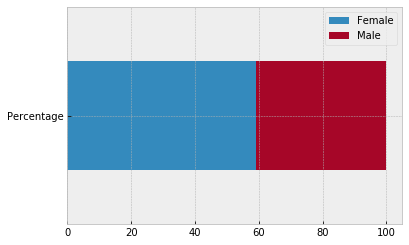

In [6]:
sexo = pd.DataFrame({'Female':sexos.female*100, 'Male':sexos.male*100}, index=['Percentage'])
ax = sexo.plot(kind="barh", stacked=True);

In [7]:
areas = young['Village - town'].value_counts(normalize=True)
areas.to_frame()

,Village - town
city,0.702783
village,0.297217


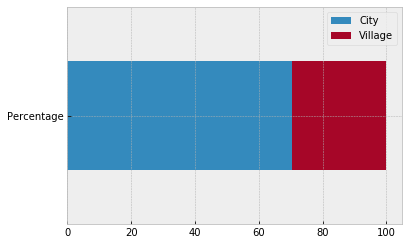

In [8]:
area = pd.DataFrame({'Village':areas.village*100, 'City':areas.city*100}, index=['Percentage'])
ax = area.plot(kind="barh", stacked=True);

****
#### Se generan las tablas de contingencias entre las variables "Gender" y el resto de las variables categóricas del dataset, para luego ir realizando el test de independencia entre "Gender" y cada una del resto de las variables categóricas.

In [9]:
tabla_smok_gender = pd.crosstab(young.Gender, young['Smoking'] ,               margins=True, normalize=True)
tabla_alco_gender = pd.crosstab(young.Gender, young['Alcohol'],                margins=True, normalize=True)
tabla_punt_gender = pd.crosstab(young.Gender, young['Punctuality'],            margins=True, normalize=True)
tabla_lyin_gender = pd.crosstab(young.Gender, young['Lying'],                  margins=True, normalize=True)
tabla_inte_gender = pd.crosstab(young.Gender, young['Internet usage'],         margins=True, normalize=True)
tabla_educ_gender = pd.crosstab(young.Gender, young['Education'],              margins=True, normalize=True)
tabla_lrha_gender = pd.crosstab(young.Gender, young['Left - right handed'],    margins=True, normalize=True)
tabla_only_gender = pd.crosstab(young.Gender, young['Only child'],             margins=True, normalize=True)
tabla_vito_gender = pd.crosstab(young.Gender, young['Village - town'],         margins=True, normalize=True)
tabla_hous_gender = pd.crosstab(young.Gender, young['House - block of flats'], margins=True, normalize=True)

#Muestro las tablas de contingencia
if True:
    display(tabla_smok_gender)
    display(tabla_alco_gender)
    display(tabla_punt_gender)
    display(tabla_lyin_gender)
    display(tabla_inte_gender)
    display(tabla_educ_gender)
    display(tabla_lrha_gender)
    display(tabla_only_gender)
    display(tabla_vito_gender)
    display(tabla_hous_gender)

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Gender,,,,,
female,0.111446,0.109438,0.123494,0.246988,0.591365
male,0.078313,0.065261,0.084337,0.180723,0.408635
All,0.189759,0.174699,0.207831,0.427711,1.000000


Alcohol,drink a lot,never,social drinker,All
Gender,,,,
female,0.104104,0.068068,0.418418,0.590591
male,0.117117,0.055055,0.237237,0.409409
All,0.221221,0.123123,0.655656,1.000000


Punctuality,i am always on time,i am often early,i am often running late,All
Gender,,,,
female,0.218563,0.186627,0.185629,0.590818
male,0.177645,0.136727,0.094810,0.409182
All,0.396208,0.323353,0.280439,1.000000


Lying,everytime it suits me,never,only to avoid hurting someone,sometimes,All
Gender,,,,,
female,0.078842,0.031936,0.147705,0.333333,0.591816
male,0.058882,0.018962,0.119760,0.210579,0.408184
All,0.137725,0.050898,0.267465,0.543912,1.000000


Internet usage,few hours a day,less than an hour a day,most of the day,no time at all,All
Gender,,,,,
female,0.426295,0.102590,0.059761,0.001992,0.590637
male,0.310757,0.035857,0.061753,0.000996,0.409363
All,0.737052,0.138446,0.121514,0.002988,1.000000


Education,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,All
Gender,,,,,,,
female,0.122632,0.005982,0.000000,0.043868,0.053838,0.363908,0.590229
male,0.088734,0.003988,0.004985,0.035892,0.023928,0.252243,0.409771
All,0.211366,0.009970,0.004985,0.079761,0.077767,0.616152,1.000000


Left - right handed,left handed,right handed,All
Gender,,,
female,0.046953,0.543457,0.59041
male,0.052947,0.356643,0.40959
All,0.099900,0.900100,1.00000


Only child,no,yes,All
Gender,,,
female,0.438124,0.152695,0.590818
male,0.311377,0.097804,0.409182
All,0.749501,0.250499,1.000000


Village - town,city,village,All
Gender,,,
female,0.417,0.174,0.591
male,0.287,0.122,0.409
All,0.704,0.296,1.000


House - block of flats,block of flats,house/bungalow,All
Gender,,,
female,0.350,0.240,0.59
male,0.242,0.168,0.41
All,0.592,0.408,1.00


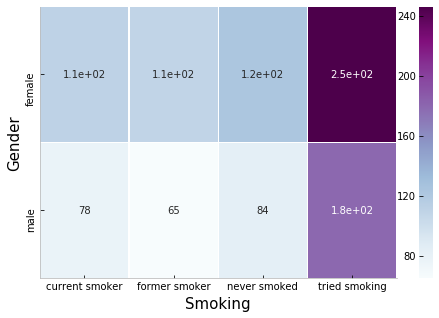

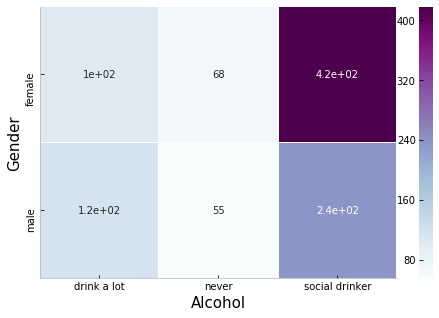

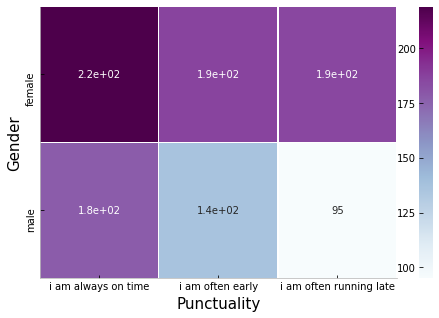

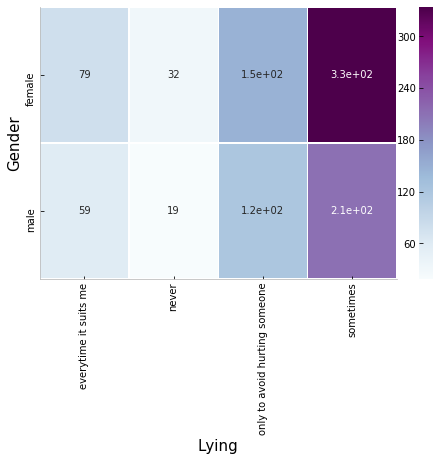

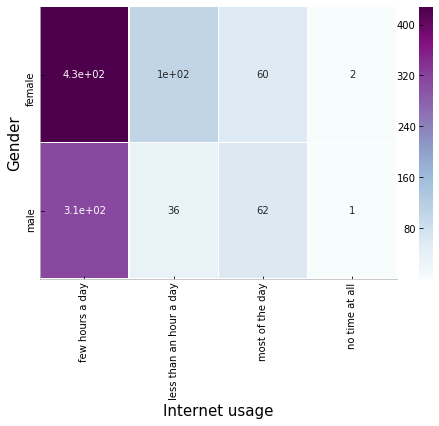

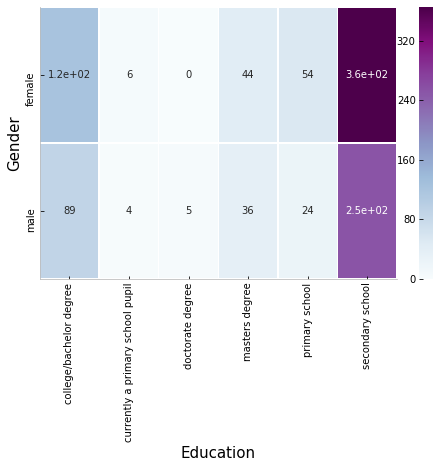

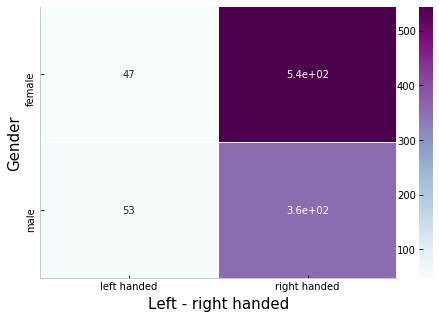

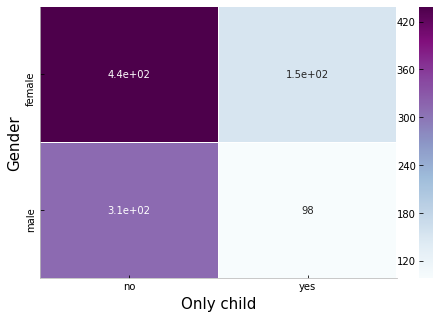

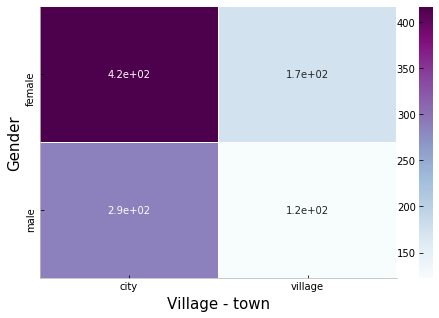

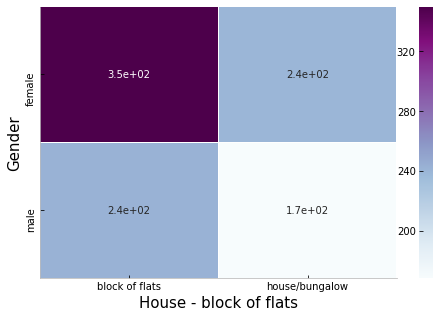

In [10]:
if True:
    #Genera las mismas tablas pero sin los márgenes "All" para poder realizar los mapas de calor
    obs_tabla_smok_gender = pd.crosstab(young.Gender, young['Smoking'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_smok_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Smoking",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_alco_gender = pd.crosstab(young.Gender, young['Alcohol'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_alco_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Alcohol",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_punt_gender = pd.crosstab(young.Gender, young['Punctuality'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_punt_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Punctuality",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_lyin_gender = pd.crosstab(young.Gender, young['Lying'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_lyin_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Lying",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_inte_gender = pd.crosstab(young.Gender, young['Internet usage'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_inte_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Internet usage",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()

    obs_tabla_educ_gender = pd.crosstab(young.Gender, young['Education'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_educ_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Education",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_lrha_gender = pd.crosstab(young.Gender, young['Left - right handed'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_lrha_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Left - right handed",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_only_gender = pd.crosstab(young.Gender, young['Only child'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_only_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Only child",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_vito_gender = pd.crosstab(young.Gender, young['Village - town'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_vito_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Village - town",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_hous_gender = pd.crosstab(young.Gender, young['House - block of flats'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_hous_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("House - block of flats",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()

****
#### El test de independencia de $\chi^2$, lo podemos realizar de manera manual ó bien utilizando la librería "scipy.stats". En nuestro caso vamos a mostrar en primer lugar como sería el cálculo manual y luego usaremos la función "chi2_contingency".
#### Además, el test $\chi^2$, define las hipótesis de la siguiente manera:
$$H_0 = Las\;variables\;son\;independientes\;(Hipotesis\;nula)$$
$$H_1 = Las\;variables\;estan\;relacionadas$$

In [11]:
#Test de independencia Chi-Cuadrado para "Gender" y "Smoking" (cálculo manual)
print("\nGender - Smoking: Manual\n")
expected = np.outer(tabla_smok_gender["All"][0:2],tabla_smok_gender.ix["All"][0:4])/tabla_smok_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["current smoker","former smoker","never smoked","tried smoking"]
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_smok_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   # 3 grados de libertad
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))
del expected, chi_squared_stat, crit, p_value


Gender - Smoking: Manual

Chi2 = 991266.1152347075
P_valor = 0.0


In [12]:
#Test de independencia Chi-Cuadrado para "Gender" y "Smoking" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_smok_gender)
print("\nGender - Smoking: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Smoking')
    
del chi2, p, dof, ex


Gender - Smoking: Scipy

Chi2 = 1.246099633240504
P_valor = 0.7419702557454063

Las variables son INDEPENDIENTES


#### Como podemos ver, los valores obtenidos de $\chi^2$ y $p_{valor}$ son los mismos, por lo tanto el cálculo manual se corresponde con el cálculo mediante la función de scipy.
#### Dado que $p_{valor}$ es mayor que el umbral estándar $0.05$ (nivel de significancia), no podemos rechazar la hipótesis nula de que las variables son independientes. 

#### Continuamos realizando los test de $\chi^2$ para el resto de las variables categóricas.

In [13]:
#Test de independencia Chi-Cuadrado para "Gender" y "Alcohol" (cálculo manual)
print("\nGender - Alcohol: Manual\n")
expected = np.outer(tabla_alco_gender["All"][0:2],tabla_alco_gender.ix["All"][0:3])/tabla_alco_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["drink a lot","never","social drinker"]
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_alco_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 2)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=2)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Alcohol" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_alco_gender)
print("\nGender - Alcohol: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Alcohol')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Alcohol: Manual

Chi2 = 1016002.821762535
P_valor = 0.0

Gender - Alcohol: Scipy

Chi2 = 20.018840603138077
P_valor = 4.4974256864364367e-05

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [14]:
#Test de independencia Chi-Cuadrado para "Gender" y "Punctuality" (cálculo manual)
print("\nGender - Punctuality: Manual\n")
expected = np.outer(tabla_punt_gender["All"][0:2],tabla_punt_gender.ix["All"][0:3])/tabla_punt_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["i am always on time","i am often early","i am often running late"]
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_punt_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 2)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=2)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Punctuality" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_punt_gender)
print("\nGender - Punctuality: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Punctuality')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Punctuality: Manual

Chi2 = 1010665.7643566567
P_valor = 0.0

Gender - Punctuality: Scipy

Chi2 = 8.647469417821046
P_valor = 0.013250304987231855

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [15]:
#Test de independencia Chi-Cuadrado para "Gender" y "Lying" (cálculo manual)
print("\nGender - Lying: Manual\n")
expected = np.outer(tabla_lyin_gender["All"][0:2],tabla_lyin_gender.ix["All"][0:4])/tabla_lyin_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["everytime it suits me","never","only to avoid hurting someone","sometimes"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_lyin_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Lying" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_lyin_gender)
print("\nGender - Lying: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Lying')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Lying: Manual

Chi2 = 1005224.7861743899
P_valor = 0.0

Gender - Lying: Scipy

Chi2 = 3.2173514714469347
P_valor = 0.3593124160315243

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

In [16]:
#Test de independencia Chi-Cuadrado para "Gender" y "Internet usage" (cálculo manual)
print("\nGender - Internet usage: Manual\n")
expected = np.outer(tabla_inte_gender["All"][0:2],tabla_inte_gender.ix["All"][0:4])/tabla_inte_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["few hours a day","less than an hour a day","most of the day","no time at all"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_inte_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Internet usage" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_inte_gender)
print("\nGender - Internet usage: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Internet usage')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Internet usage: Manual

Chi2 = 1024542.2613984427
P_valor = 0.0

Gender - Internet usage: Scipy

Chi2 = 18.459423703628325
P_valor = 0.0003535858468218354

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [17]:
#Test de independencia Chi-Cuadrado para "Gender" y "Education" (cálculo manual)
print("\nGender - Education: Manual\n")
expected = np.outer(tabla_educ_gender["All"][0:2],tabla_educ_gender.ix["All"][0:6])/tabla_educ_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["college/bachelor degree","currently a primary school pupil","doctorate degree","masters degree","primary school","secondary school"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_educ_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 5)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=5)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Education" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_educ_gender)
print("\nGender - Education: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Education')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Education: Manual

Chi2 = 1015228.0067496493
P_valor = 0.0

Gender - Education: Scipy

Chi2 = 11.190435443319206
P_valor = 0.04773224450754823

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [18]:
#Test de independencia Chi-Cuadrado para "Gender" y "Left-right handed" (cálculo manual)
print("\nGender - Left-right handed: Manual\n")
expected = np.outer(tabla_lrha_gender["All"][0:2],tabla_lrha_gender.ix["All"][0:2])/tabla_lrha_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["left handed","right handed"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_lrha_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Left-right handed" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_lrha_gender, correction=False)
print("\nGender - Left-right handed: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Left - right handed')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Left-right handed: Manual

Chi2 = 1006667.4894856946
P_valor = 0.0

Gender - Left-right handed: Scipy

Chi2 = 6.660828657037643
P_valor = 0.009855507556855131

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [19]:
#Test de independencia Chi-Cuadrado para "Gender" y "Only child" (cálculo manual)
print("\nGender - Only child: Manual\n")
expected = np.outer(tabla_only_gender["All"][0:2],tabla_only_gender.ix["All"][0:2])/tabla_only_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["no","yes"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_only_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Only child" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_only_gender, correction=False)
print("\nGender - Only child: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Only child')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Only child: Manual

Chi2 = 1002488.6355703503
P_valor = 0.0

Gender - Only child: Scipy

Chi2 = 0.4866622458585997
P_valor = 0.48541999004213254

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

In [20]:
#Test de independencia Chi-Cuadrado para "Gender" y "Village-town" (cálculo manual)
print("\nGender - Village-town: Manual\n")
expected = np.outer(tabla_vito_gender["All"][0:2],tabla_vito_gender.ix["All"][0:2])/tabla_vito_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["city","village"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_vito_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Village-town" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_vito_gender, correction=False)
print("\nGender - Village-town: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Village - town')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Village-town: Manual

Chi2 = 998018.3930817572
P_valor = 0.0

Gender - Village-town: Scipy

Chi2 = 0.01739308175707461
P_valor = 0.8950769669445118

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

In [21]:
#Test de independencia Chi-Cuadrado para "Gender" y "House-block of flats" (cálculo manual)
print("\nGender - House-block of flats: Manual\n")
expected = np.outer(tabla_hous_gender["All"][0:2],tabla_hous_gender.ix["All"][0:2])/tabla_hous_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["block of flats","house/bungalow"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_hous_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "House-block of flats" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_hous_gender, correction=False)
print("\nGender - House-block of flats: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('House - block of flats')
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - House-block of flats: Manual

Chi2 = 998009.8725254692
P_valor = 0.0

Gender - House-block of flats: Scipy

Chi2 = 0.008872525469077366
P_valor = 0.9249549841293704

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

### Para resumir los resultados obtenidos con los test de independencia $\chi^2$, se crea la siguiente tabla:

In [22]:
tabla_independencia = pd.DataFrame({'Gender/Smoking':'SI',
                                    'Gender/Alcohol':'NO',
                                    'Gender/Punctuality':'NO',
                                    'Gender/Lying':'SI',
                                    'Gender/Internet usage':'NO',
                                    'Gender/Education':'NO',
                                    'Gender/Left-right handed':'NO',
                                    'Gender/Only child':'SI',
                                    'Gender/Village-town':'SI',
                                    'Gender/House-block of flats':'SI'},index=['Independiente'])
display(tabla_independencia)

,Gender/Alcohol,Gender/Education,Gender/House-block of flats,Gender/Internet usage,Gender/Left-right handed,Gender/Lying,Gender/Only child,Gender/Punctuality,Gender/Smoking,Gender/Village-town
Independiente,NO,NO,SI,NO,NO,SI,SI,NO,SI,SI


#### Para sacar en limpio, las variables dependientes, según el test $\chi^2$, resultaron ser:
* Gender/Alcohol
* Gender/Education
* Gender/Internet usage
* Gender/Left-right handed
* Gender/Punctuality

****
### Con el objetivo de profundizar el análisis se prosigue con la realización de gráficos de la variable género contra las variables que poseen dependencia ("Alcohol", "Education", "Internet usage", "Left-right handed", "Punctuality"), a partir de los resultados obtenidos con los tests de independencia $\chi^2$:

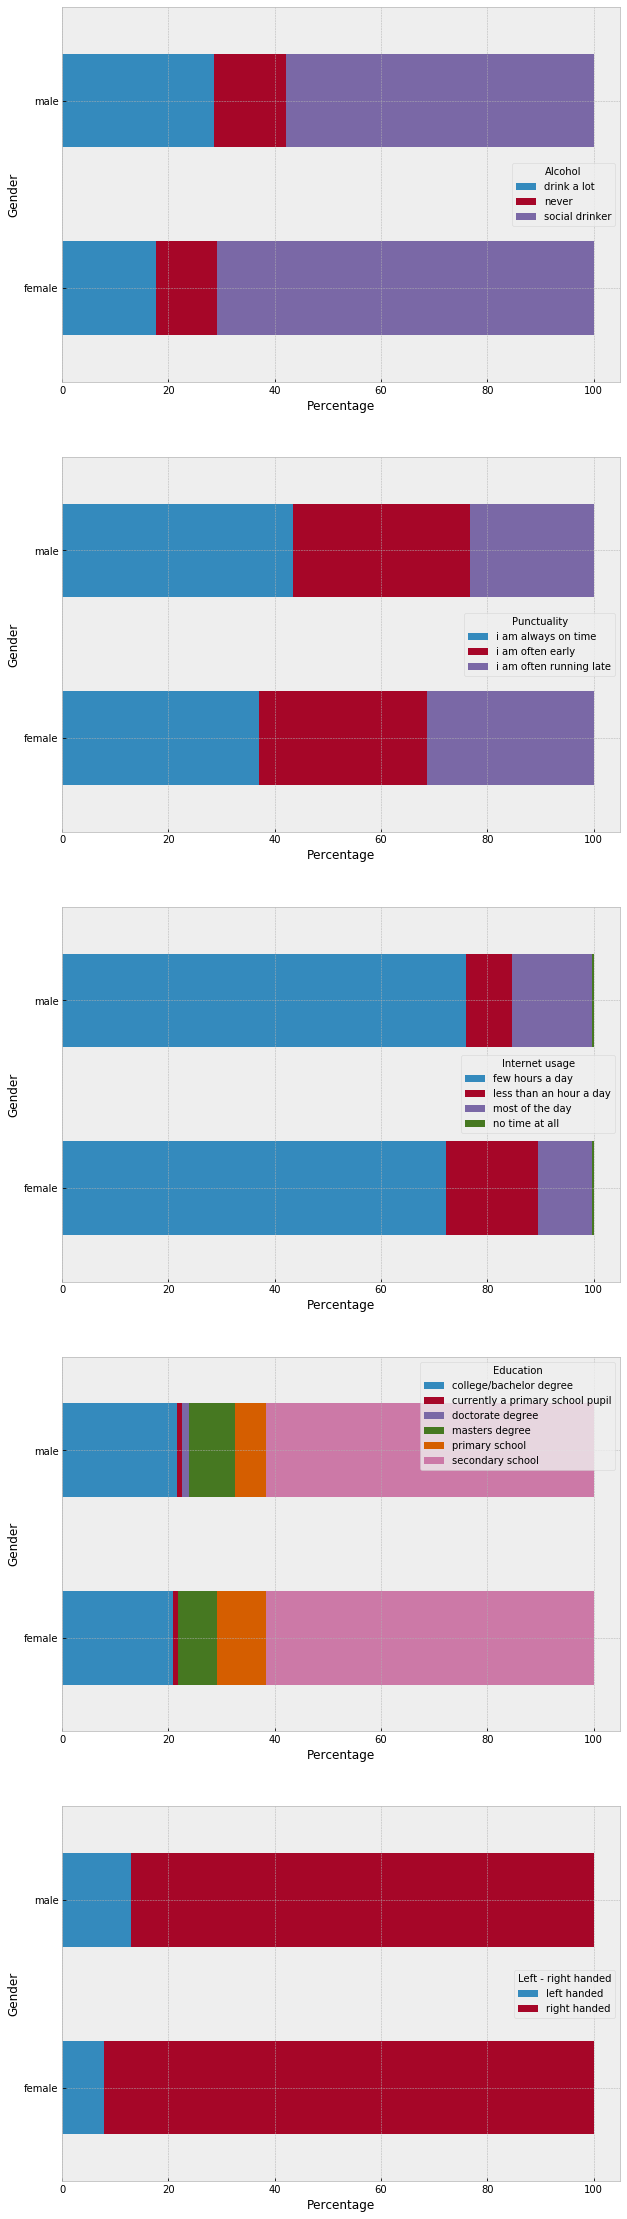

In [23]:
var_of_interest = 'Gender'
fig, ax = plt.subplots(nrows = 5, ncols = 1,figsize=(10,40), sharex=False)
for i in range(5):
    tab = pd.crosstab(young[var_of_interest], young[var_cat_interest[i]])
    tab_prop = tab.div(tab.sum(1).astype(float), axis=0)*100
    ax[i] = tab_prop.plot(kind="barh", stacked=True, ax=ax[i])
    ax[i].set(xlabel="Percentage")
#plt.savefig('Imagenes/dependientes.png')

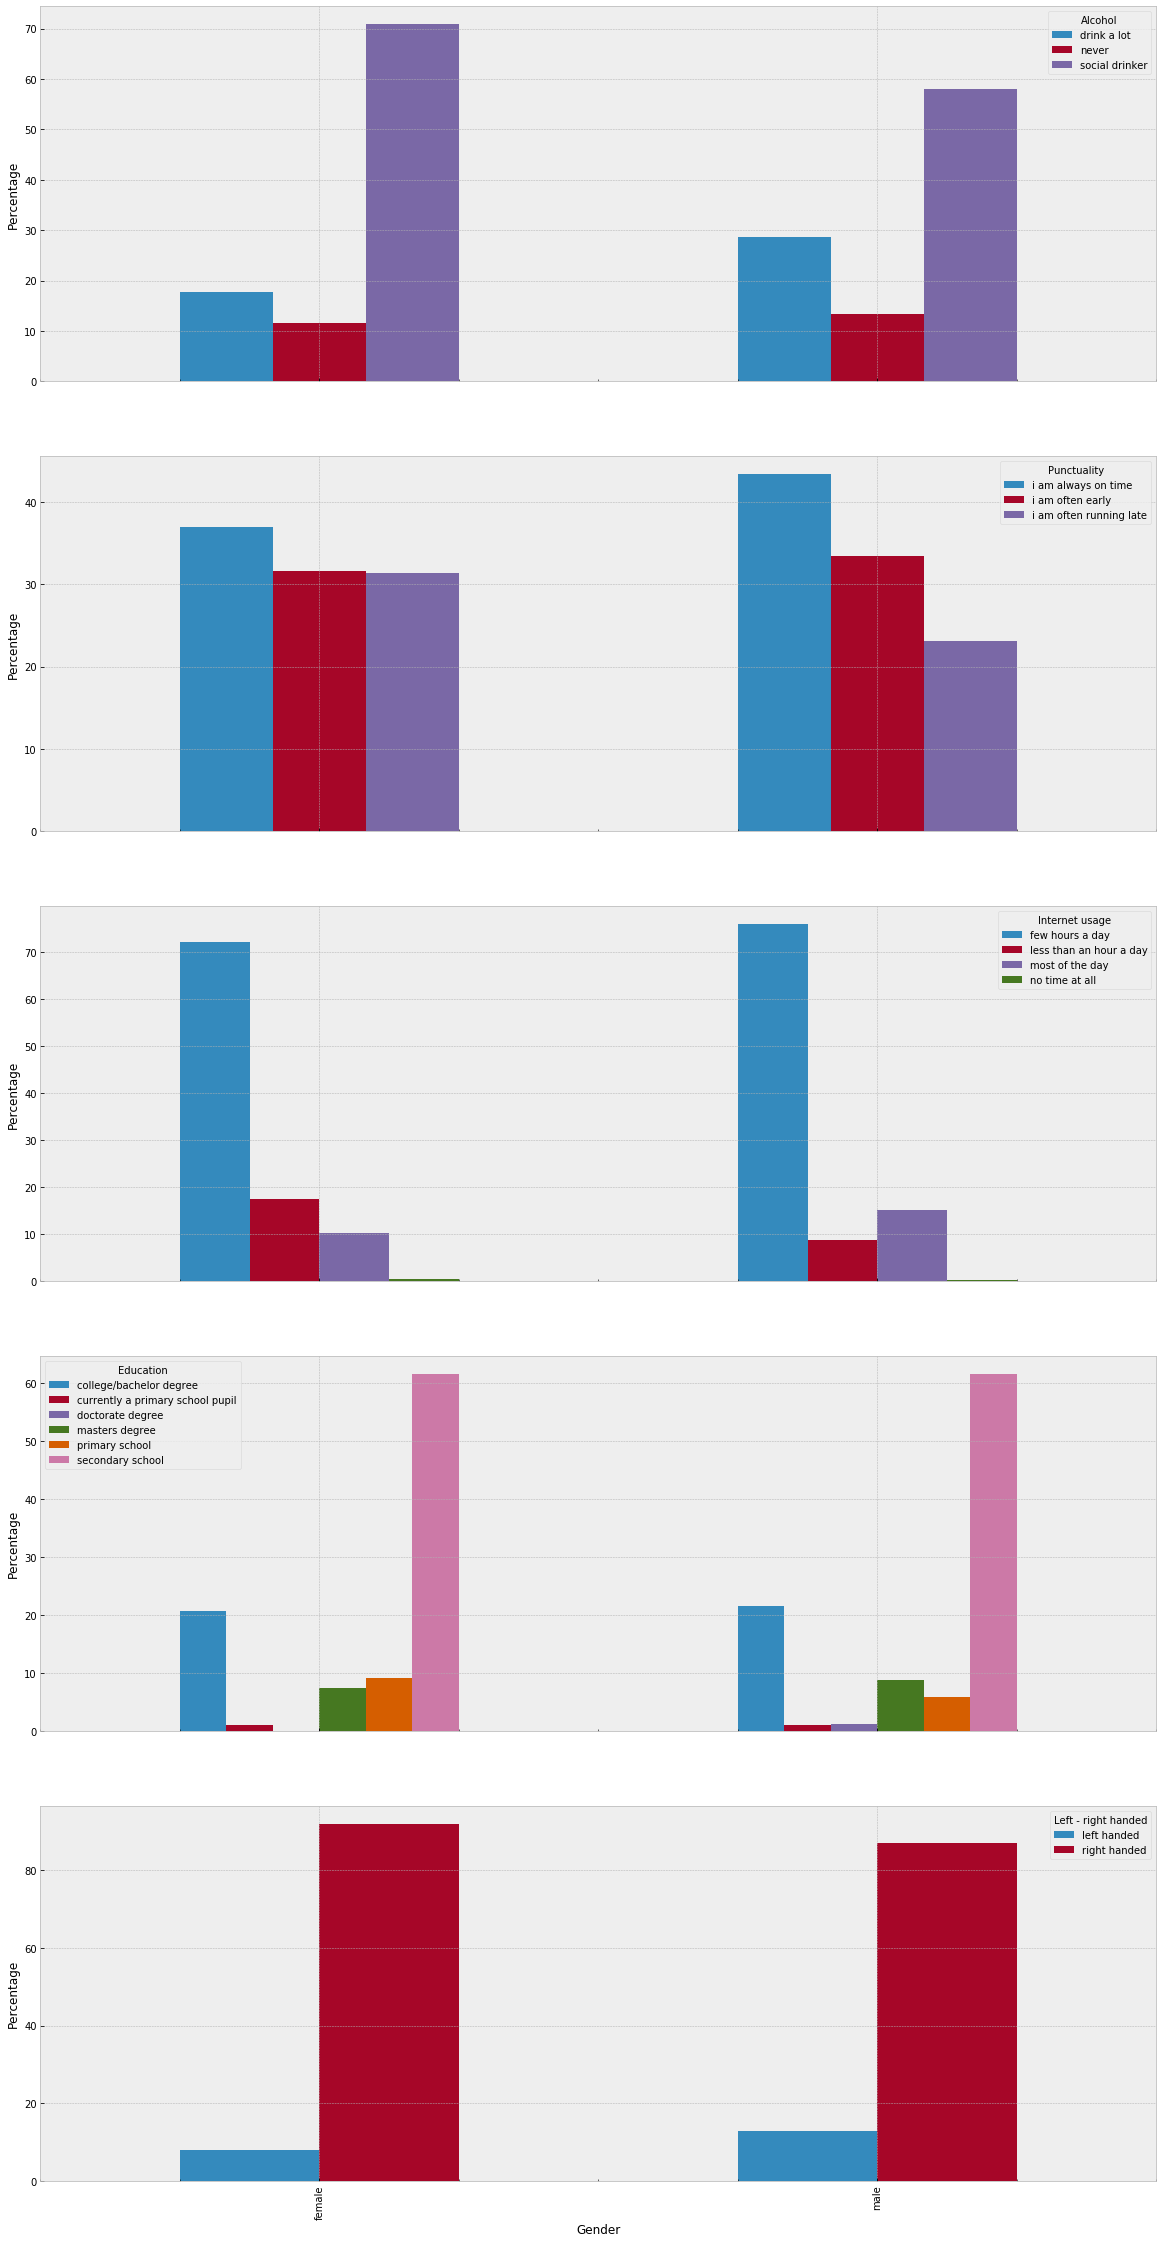

In [24]:
var_of_interest = 'Gender'
fig, ax = plt.subplots(nrows = 5, ncols = 1,figsize=(20,40), sharex=True)
for i in range(5):
    tab = pd.crosstab(young[var_of_interest], young[var_cat_interest[i]])
    tab_prop = tab.div(tab.sum(1).astype(float), axis=0)*100
    ax[i] = tab_prop.plot(kind="bar", ax=ax[i] )
    ax[i].set_ylabel('Percentage')

### En Laboratorio 1 se realizó el cálculo de la correlación correspondiente al género, con el resto de las categorías. A continuación se presenta nuevamente dicho cálculo, para las variables cuantitativas y luego se extraerán las correlaciones más significativas para su posterior análisis.

In [46]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables", fontsize=120)
    sns.barplot(x=y, y=x,  ax = ax)
    plt.xticks(rotation=90, fontsize=55)
    plt.yticks(fontsize=55)
    ax.set_ylabel("Correlation coefficients", fontsize=80)
    ax.set_xlabel("Categorías", fontsize=80)

def correlation_plot(var_of_interest, df_main, mapping, figsize = (120,60)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical variables
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    return corrs_one

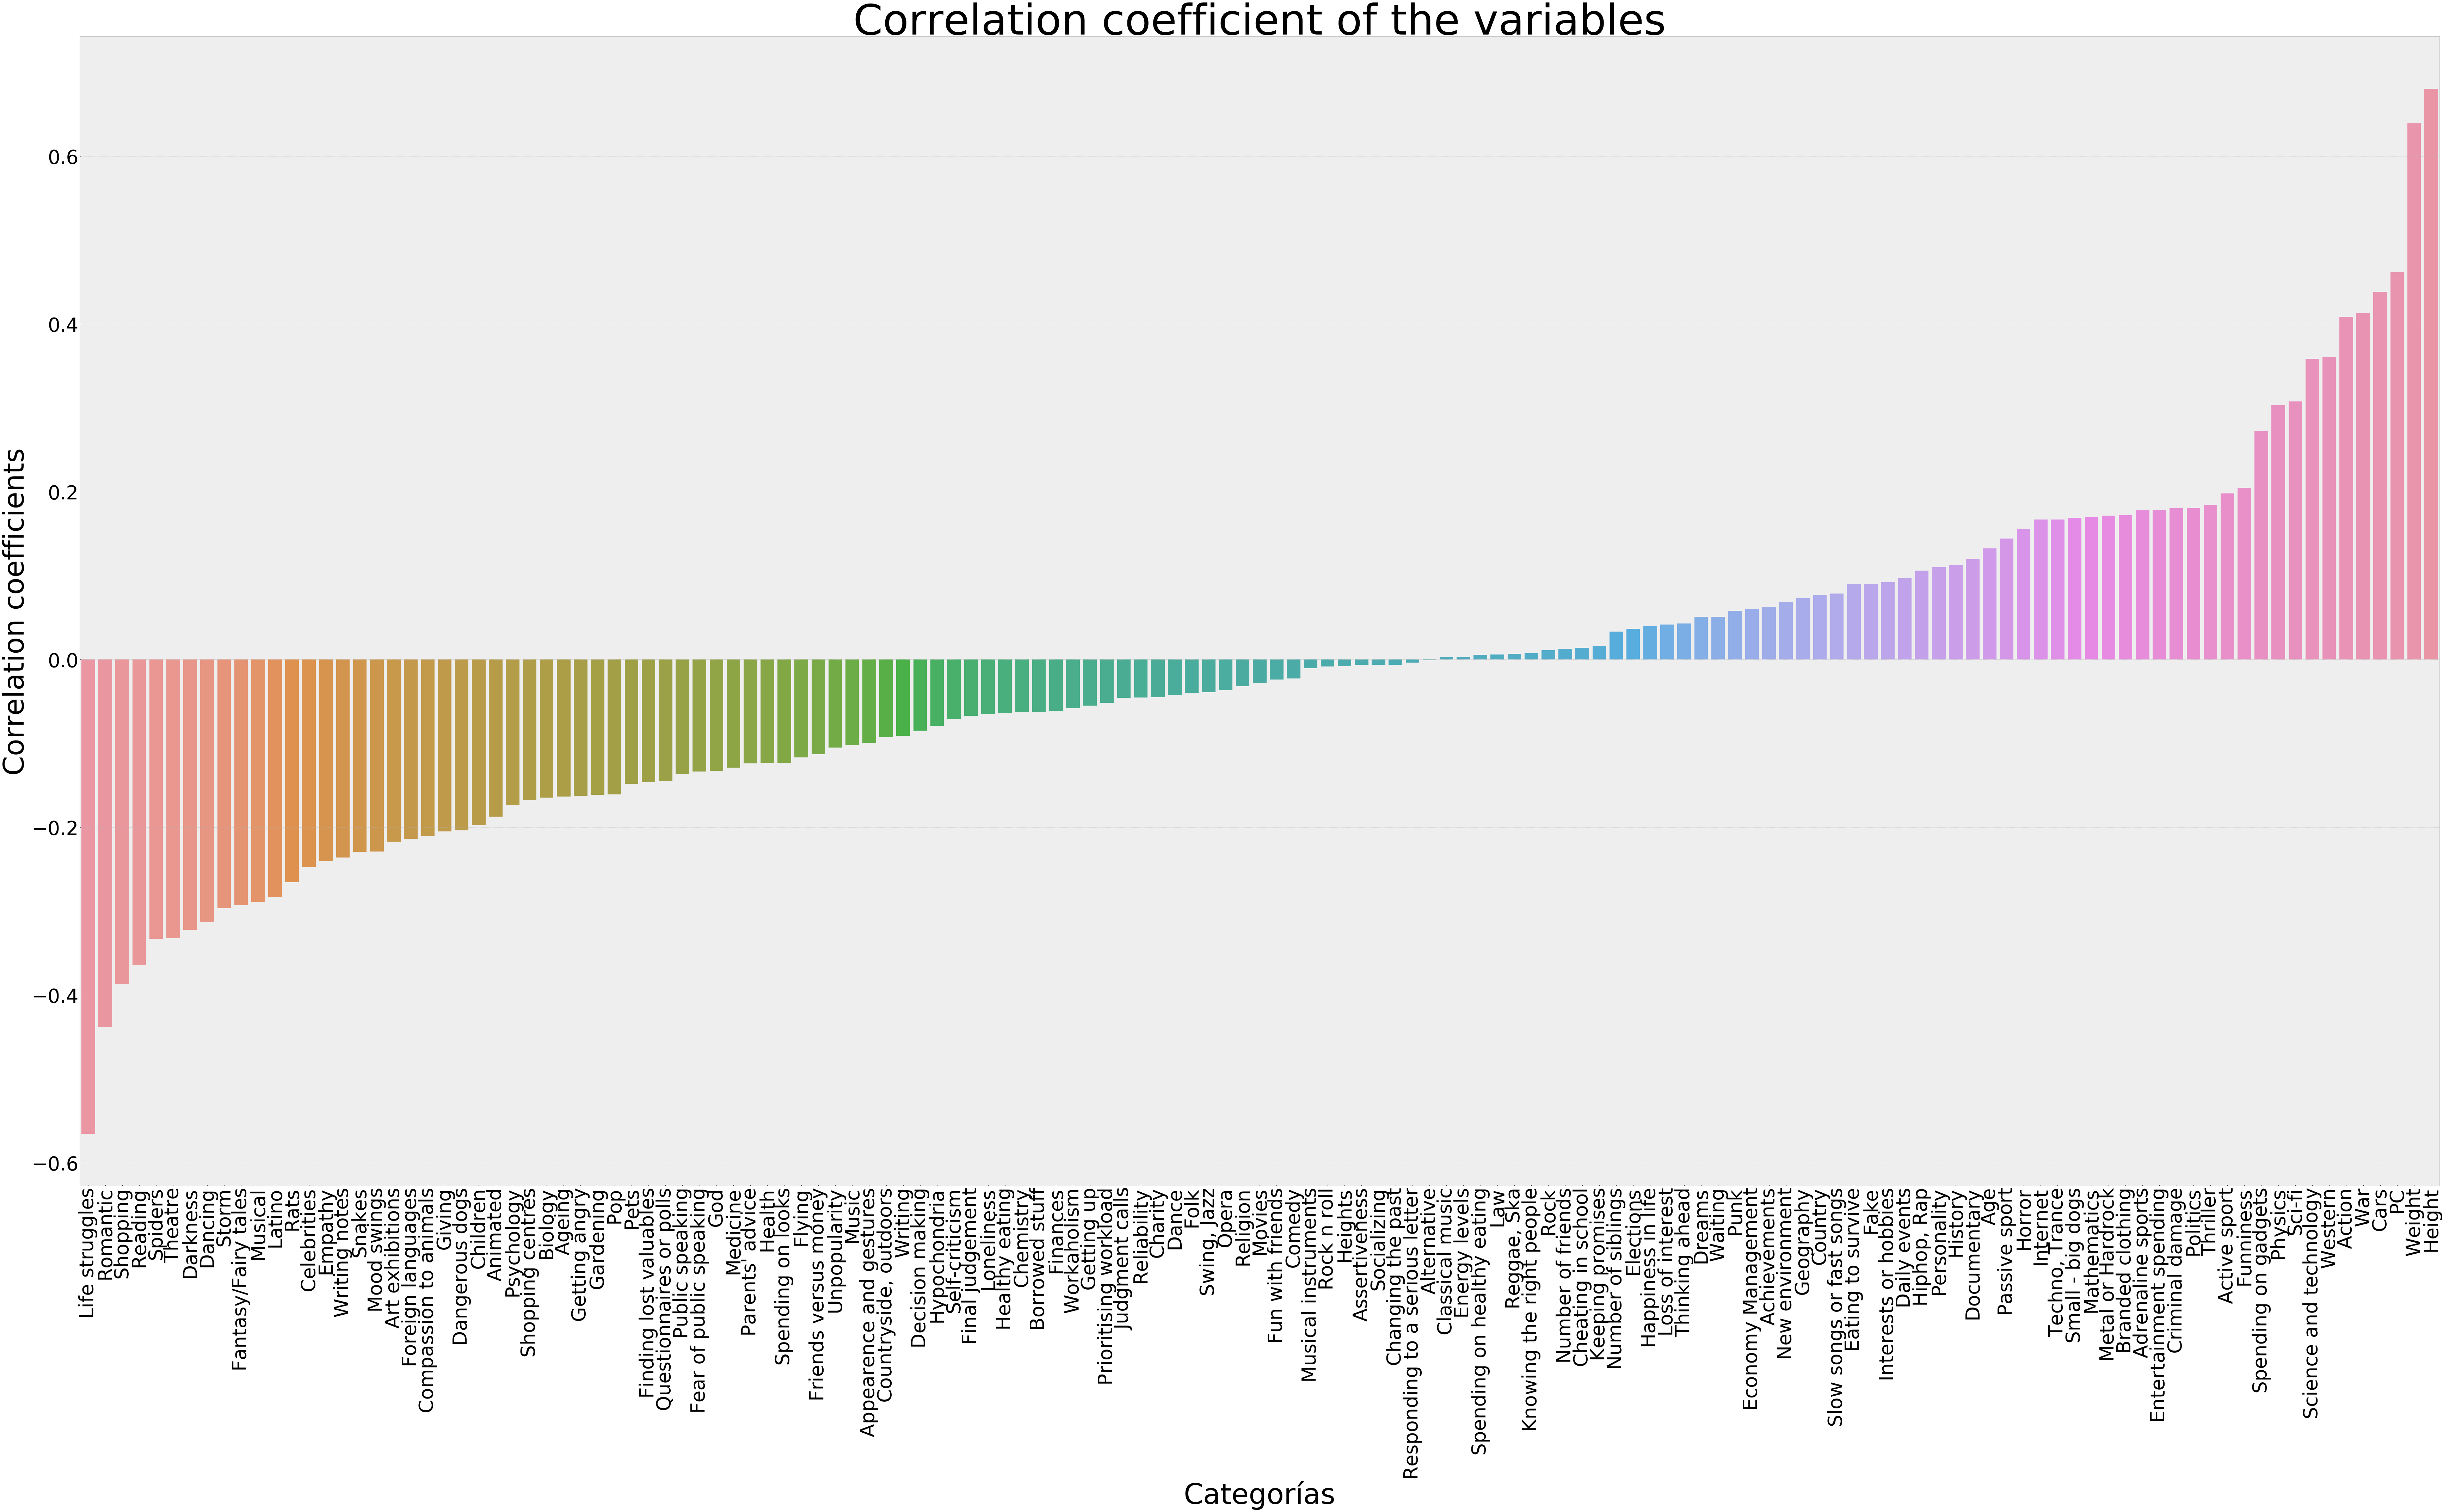

In [48]:
var_of_interest = 'Gender'
mapping = {var_of_interest: {'female': 0, 'male': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

corrs_area = correlation_plot(var_of_interest, young, mapping)
plt.savefig('Imagenes/correlac.png')

### Ahora elegiremos 12 correlaciones significativas para analizar. Del lado de las correlaciones negativas tomaremos "Life struggles", "Shopping", "Romantic", "Dancing", "Empathy" y "Theatre", mientras que del lado de las correlaciones positivas tomaremos "Height", "Weight", "Cars", "Sci-fi", "Active Sport" y "Spending on gadgets". 
### Realizamos el análisis con gráficos de caja:

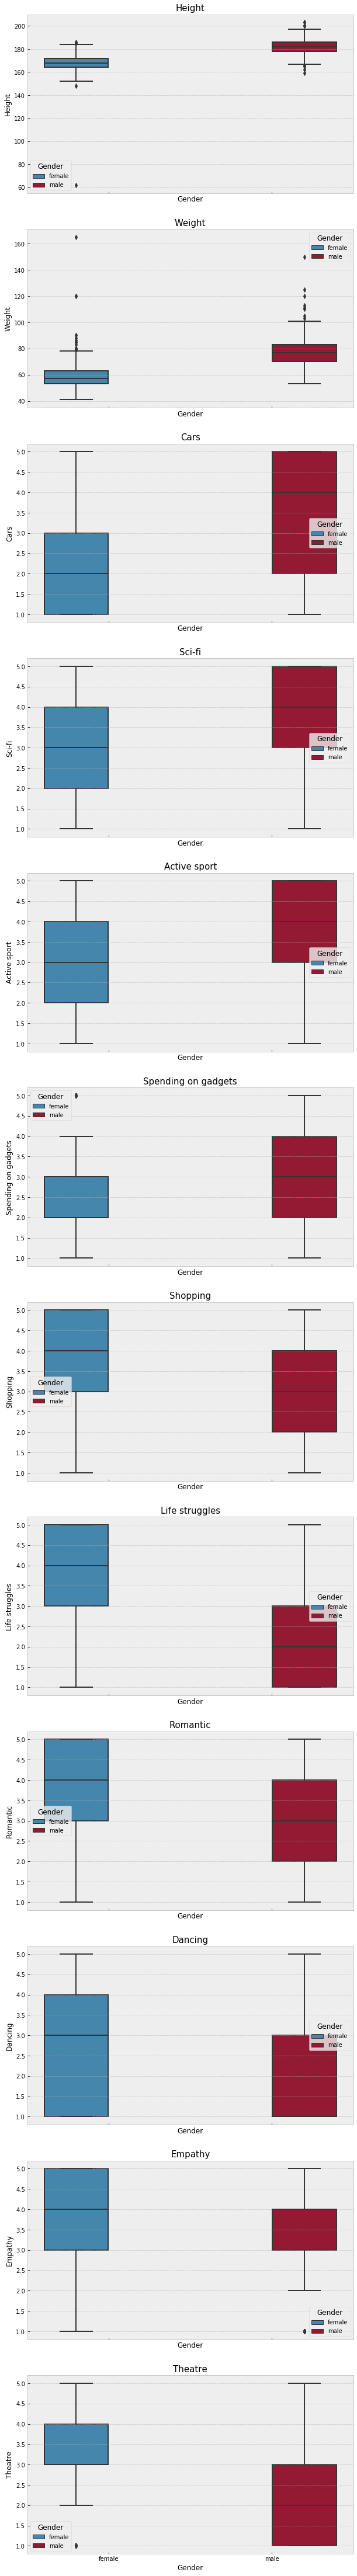

In [50]:
var_of_interest = 'Gender'
correl_of_interest = ['Height', 'Weight', 'Cars', 'Sci-fi', 'Active sport', 'Spending on gadgets',
                      'Shopping', 'Life struggles', 'Romantic', 'Dancing', 'Empathy', 'Theatre']
fig, ax = plt.subplots(nrows =12, ncols = 1 ,figsize=(10,80), sharex=True)
for indx, corr in enumerate(correl_of_interest):
    sns.boxplot(y=corr, x=var_of_interest, hue=var_of_interest, data=young, ax=ax[indx])
    ax[indx].set_title(corr, fontsize=15)
    #plt.savefig('Imagenes/' + str(corr) + '.png')

#### Este tipo de gráfico nos provee mucha información, tanto los rangos intercuartílicos como las medias, nos permiten confirmar que para éstas variables seleccionadas (de gran correlación) encontramos marcadas diferencias entre ambos géneros y pueden, por lo tanto, ser de interés para el análisis. 